In [231]:
!pip3 install pandas numpy matplotlib seaborn scikit-learn tqdm 

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from concurrent.futures import ThreadPoolExecutor
import os
from tqdm import tqdm
from sklearn.impute import KNNImputer
from sklearn.base import clone
from sklearn.linear_model import LassoCV


In [233]:
# Constants
SEED = 42

In [234]:
# Loading the datasets
train_file_path = "/kaggle/input/child-mind-institute-problematic-internet-use/train.csv"
train_df = pd.read_csv(train_file_path)
test_file_path = "/kaggle/input/child-mind-institute-problematic-internet-use/test.csv"
test_df = pd.read_csv(test_file_path)
df = train_df

In [235]:
# Basic Info about Dataset
print("\n🔹 Dataset Info:")
print(df.info())


🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898

In [236]:
# Checking for Missing Values
print("\n🔍 Missing Values Count:")
print(df.isnull().sum())


🔍 Missing Values Count:
id                                           0
Basic_Demos-Enroll_Season                    0
Basic_Demos-Age                              0
Basic_Demos-Sex                              0
CGAS-Season                               1405
CGAS-CGAS_Score                           1539
Physical-Season                            650
Physical-BMI                               938
Physical-Height                            933
Physical-Weight                            884
Physical-Waist_Circumference              3062
Physical-Diastolic_BP                     1006
Physical-HeartRate                         993
Physical-Systolic_BP                      1006
Fitness_Endurance-Season                  2652
Fitness_Endurance-Max_Stage               3217
Fitness_Endurance-Time_Mins               3220
Fitness_Endurance-Time_Sec                3220
FGC-Season                                 614
FGC-FGC_CU                                1638
FGC-FGC_CU_Zone                    

In [237]:
# Summary Statistics
print("\n📊 Summary Statistics (Numerical Features):")
print(df.describe())


📊 Summary Statistics (Numerical Features):
       Basic_Demos-Age  Basic_Demos-Sex  CGAS-CGAS_Score  Physical-BMI  \
count      3960.000000      3960.000000      2421.000000   3022.000000   
mean         10.433586         0.372727        65.454771     19.331929   
std           3.574648         0.483591        22.341862      5.113934   
min           5.000000         0.000000        25.000000      0.000000   
25%           8.000000         0.000000        59.000000     15.869350   
50%          10.000000         0.000000        65.000000     17.937682   
75%          13.000000         1.000000        75.000000     21.571244   
max          22.000000         1.000000       999.000000     59.132048   

       Physical-Height  Physical-Weight  Physical-Waist_Circumference  \
count      3027.000000      3076.000000                    898.000000   
mean         55.946713        89.038615                     27.278508   
std           7.473764        44.569040                      5.567287 

In [238]:
# Identify Categorical & Numerical Columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print(f"\n📝 Categorical Columns: {list(categorical_cols)}")
print(f"\n🔢 Numerical Columns: {list(numerical_cols)}")


📝 Categorical Columns: ['id', 'Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season', 'Fitness_Endurance-Season', 'FGC-Season', 'BIA-Season', 'PAQ_A-Season', 'PAQ_C-Season', 'PCIAT-Season', 'SDS-Season', 'PreInt_EduHx-Season']

🔢 Numerical Columns: ['Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-CGAS_Score', 'Physical-BMI', 'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference', 'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP', 'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA

In [239]:
len(numerical_cols)

70

<ipython-input-240-53b080ebd784>:6: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()


<Figure size 2000x4200 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


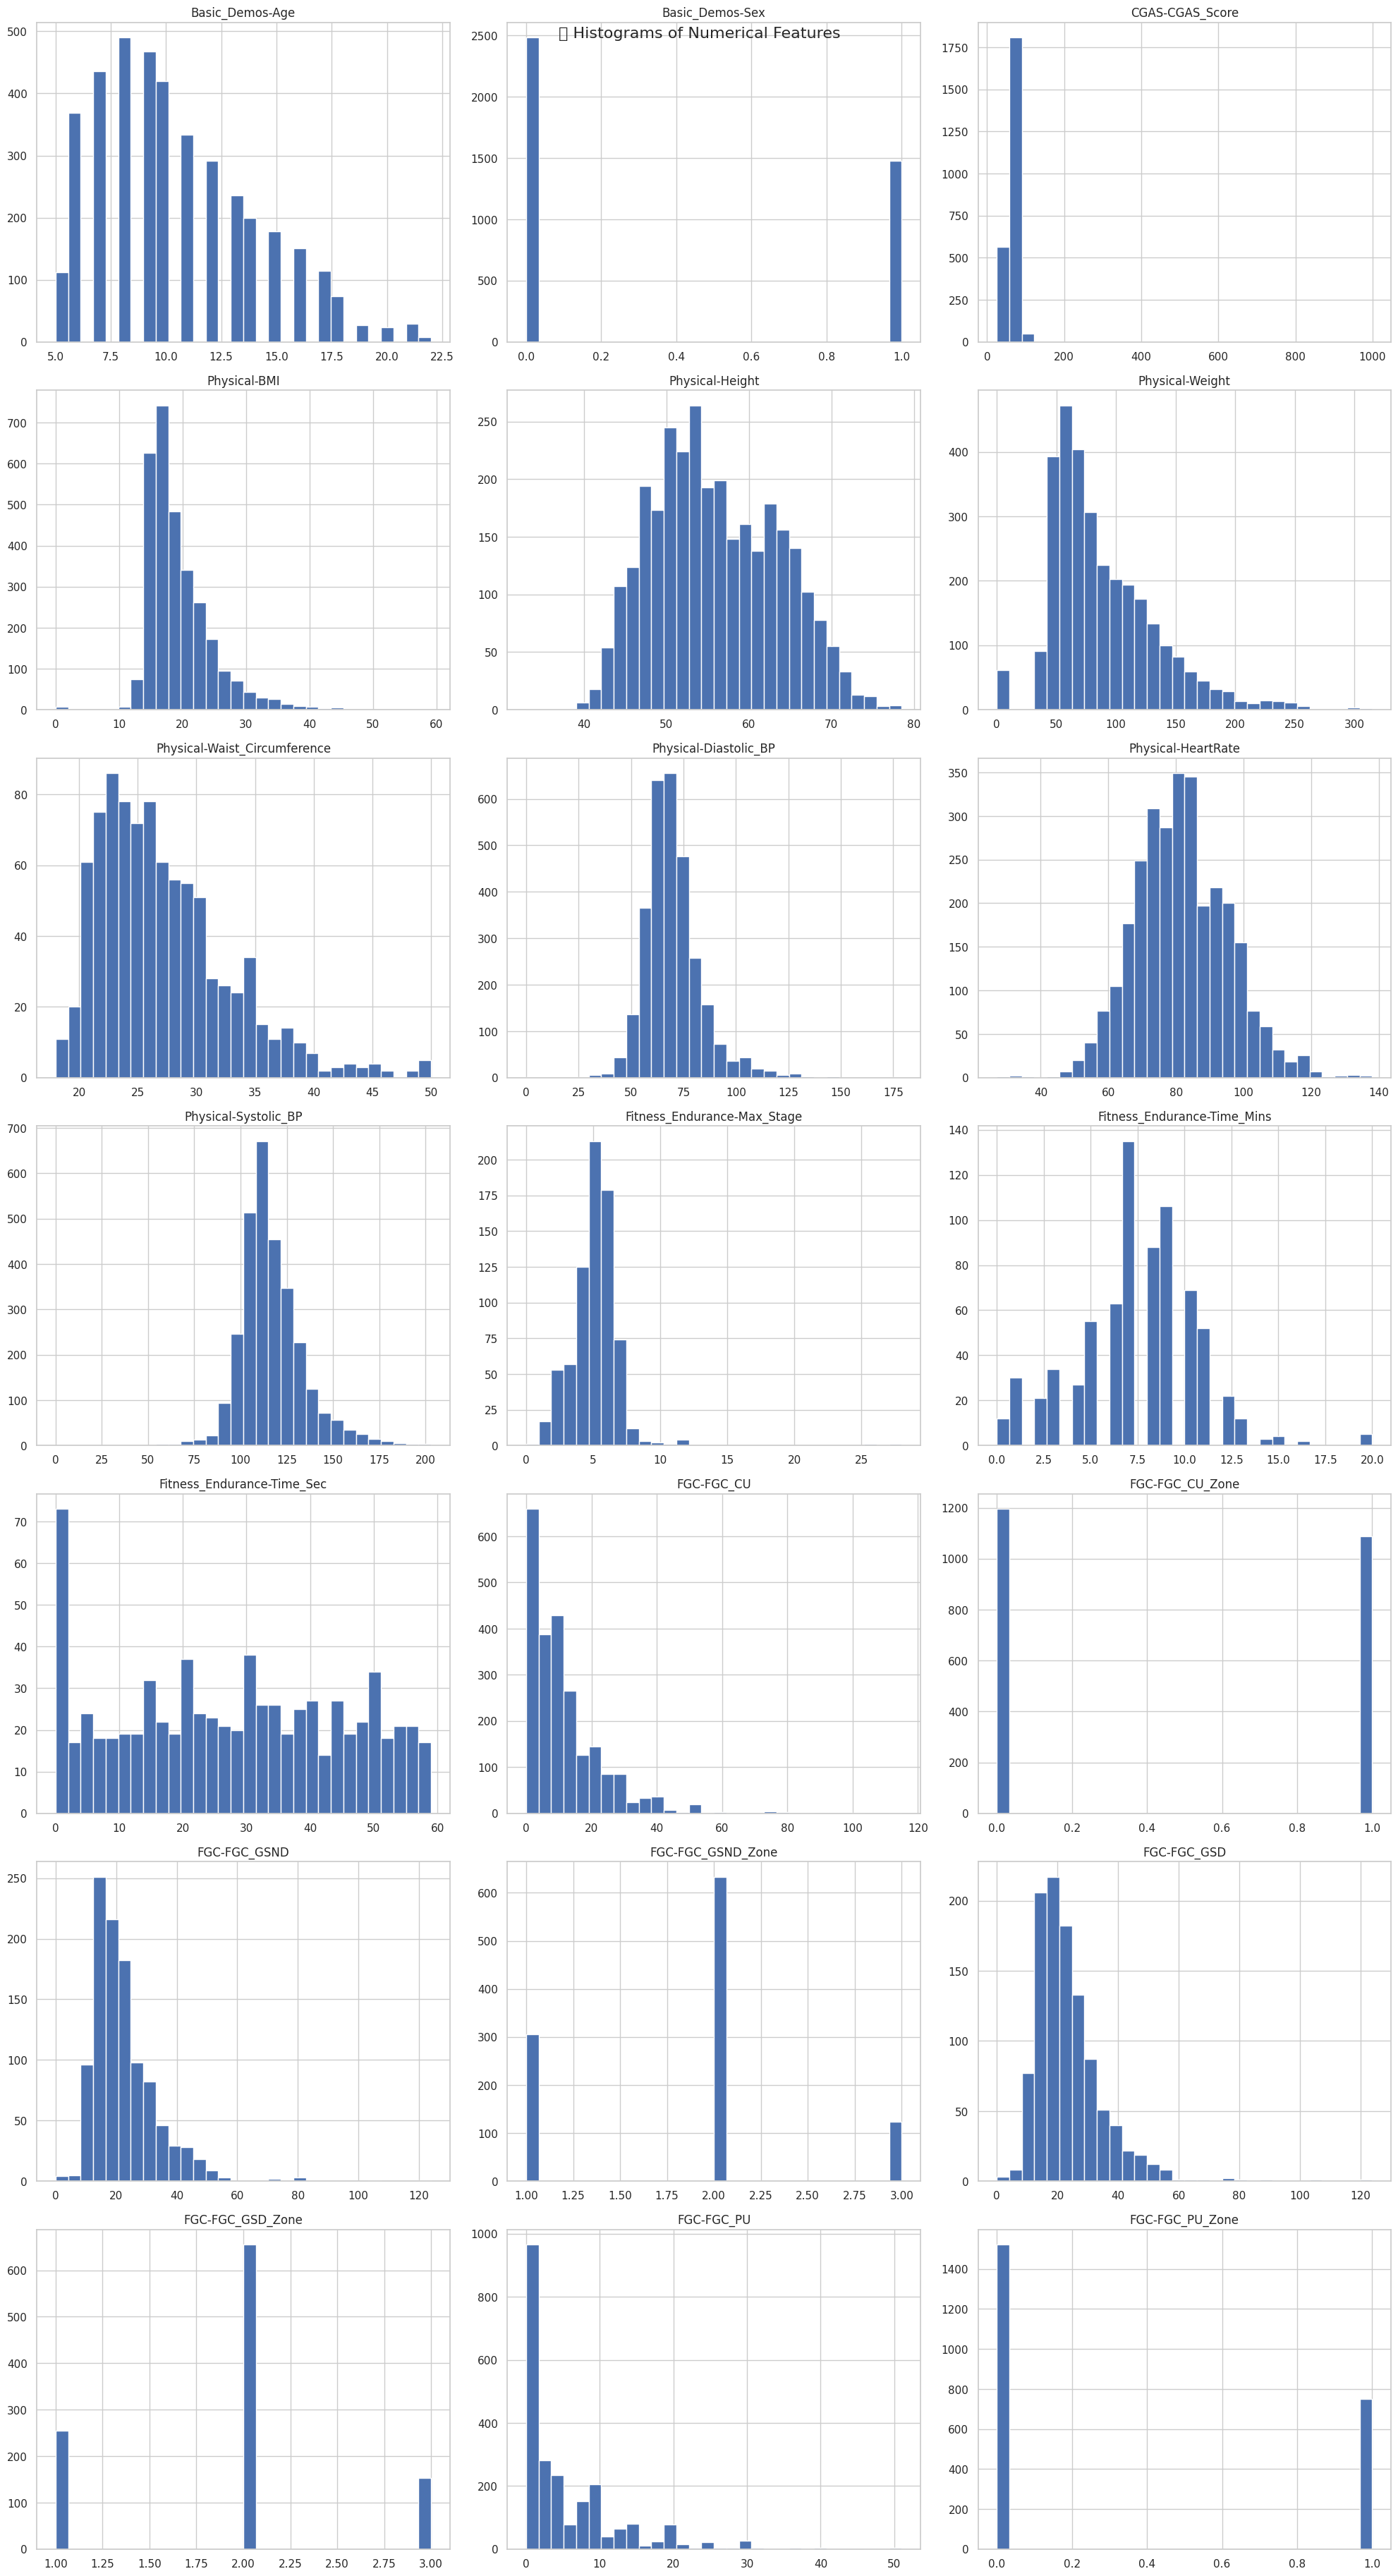

In [240]:
# Plot Histograms for Numerical Data
fig_height = len(numerical_cols[0:21]) * 2 
plt.figure(figsize=(20, fig_height))
df[numerical_cols[0:21]].hist(bins=30, figsize=(20, fig_height), layout=(len(numerical_cols[0:21])//3 + 1, 3))
plt.suptitle("📊 Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


<ipython-input-241-3bc92c035c15>:6: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()


<Figure size 2000x4200 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


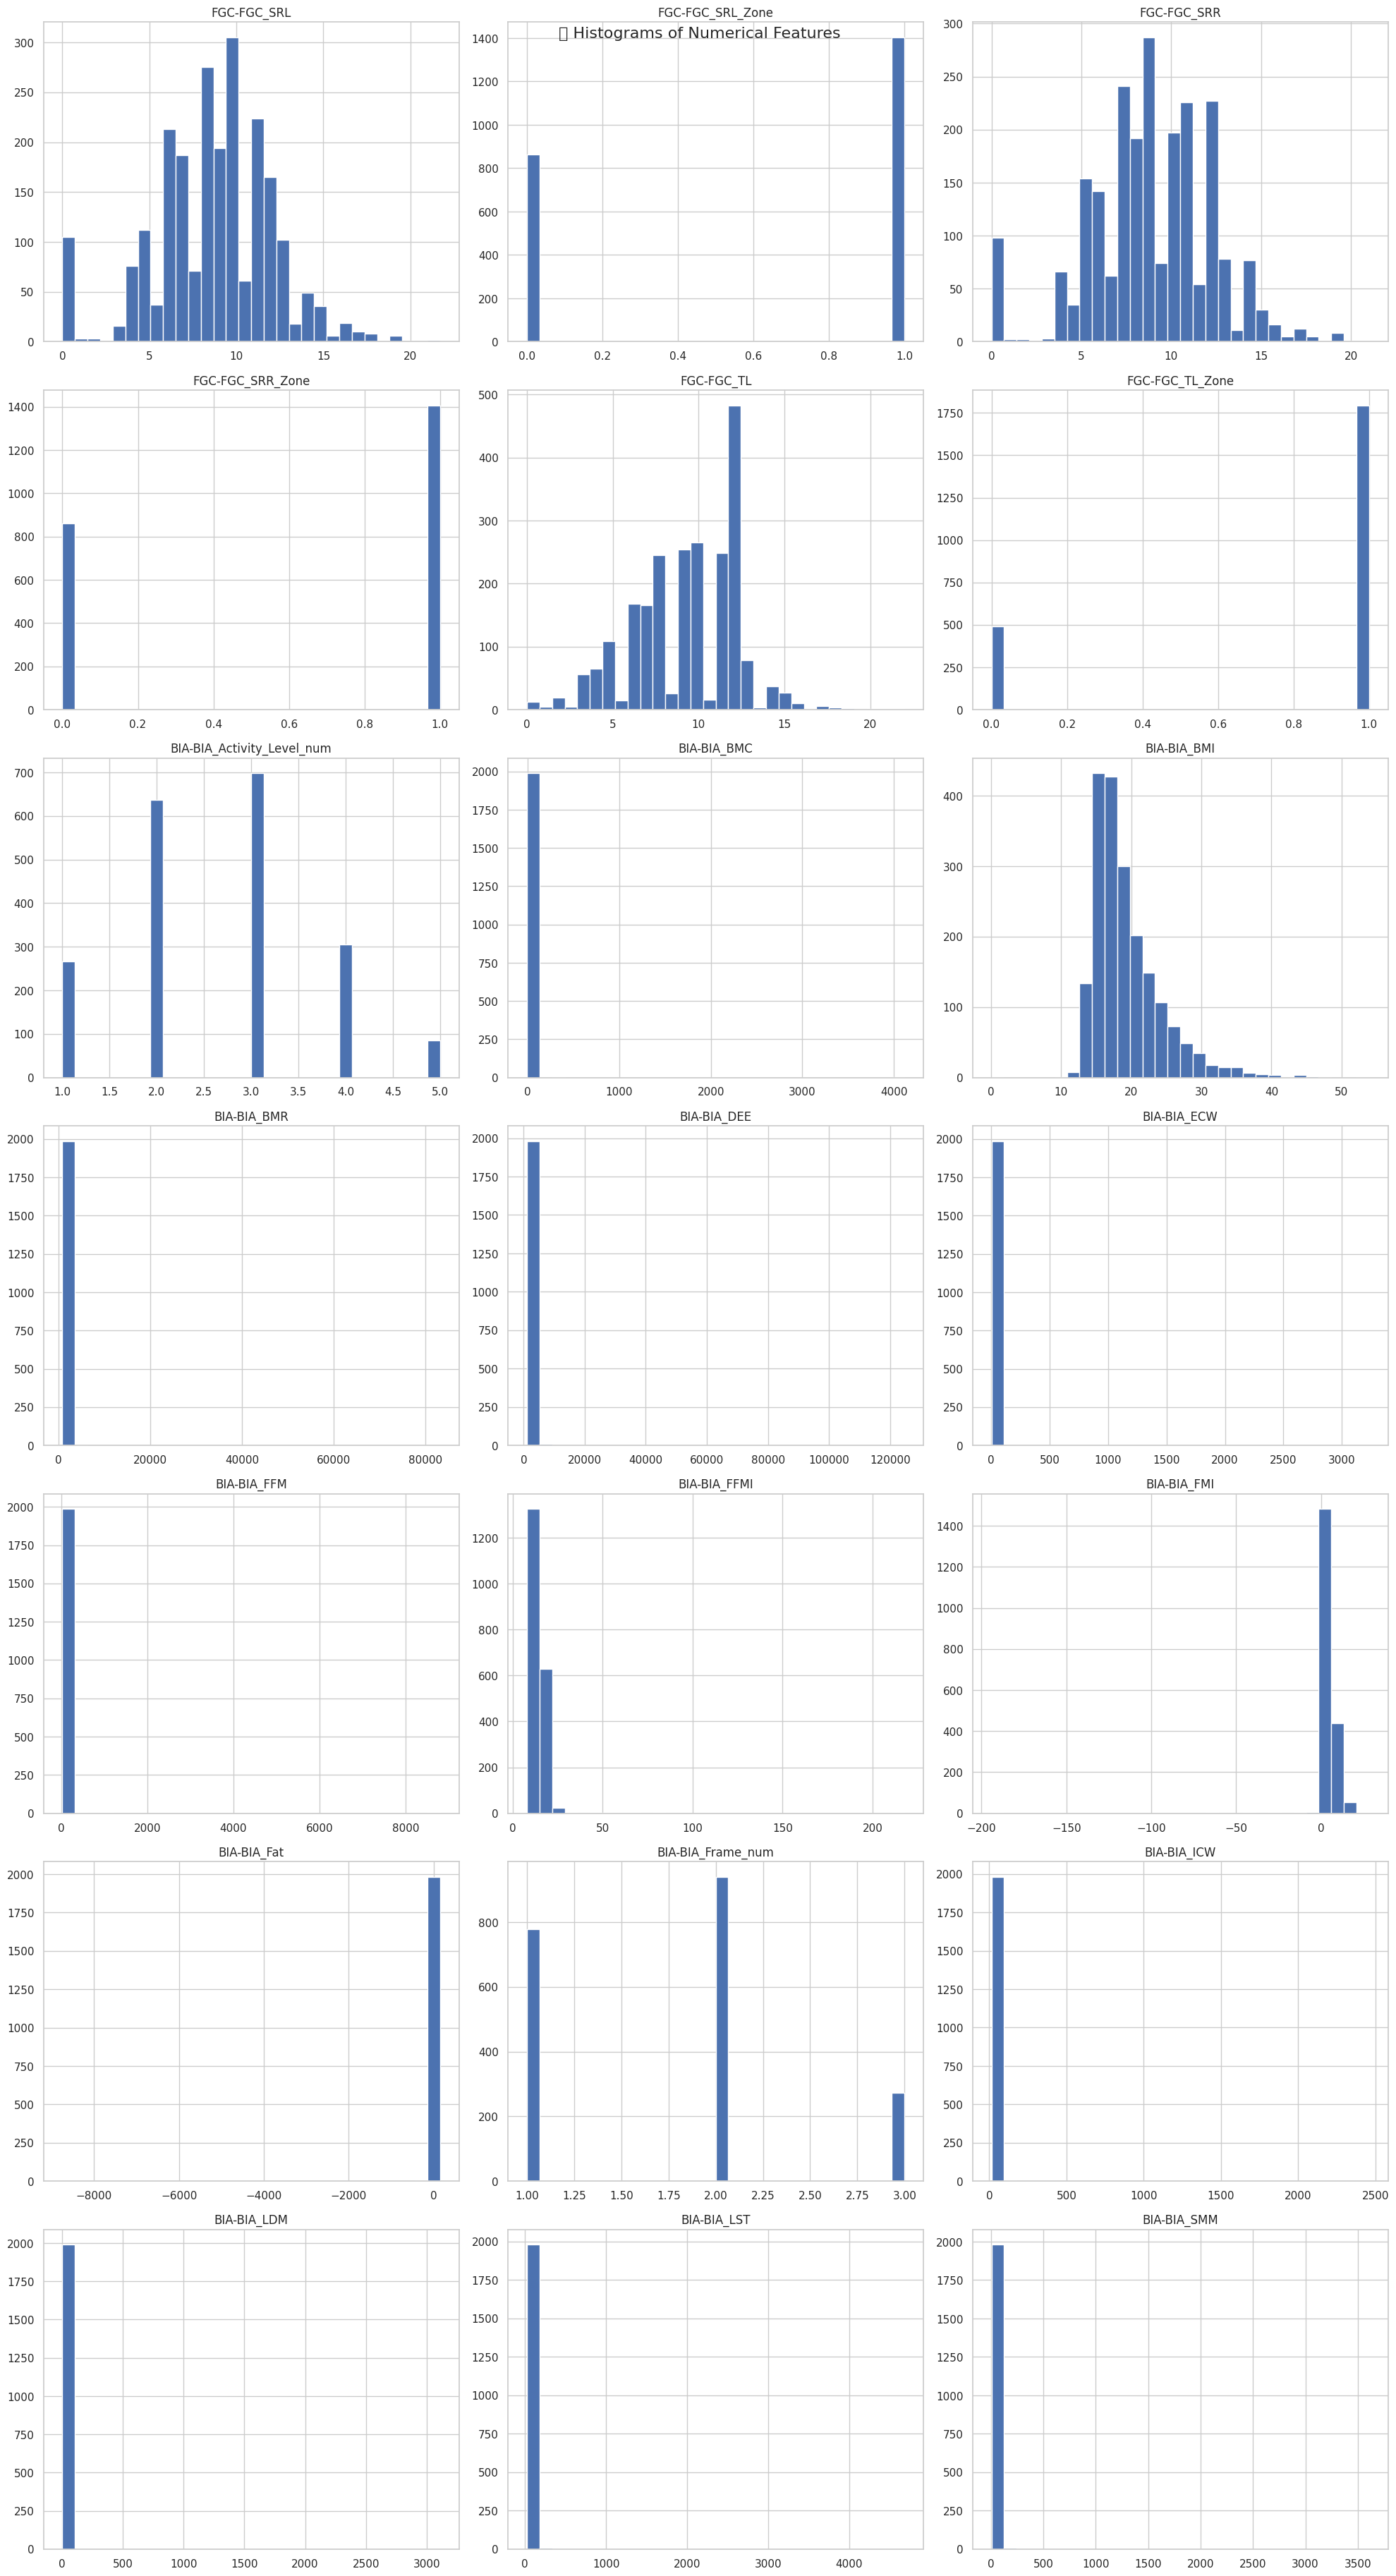

In [241]:
# Plot Histograms for Numerical Data
fig_height = len(numerical_cols[21:42]) * 2 
plt.figure(figsize=(20, fig_height))
df[numerical_cols[21:42]].hist(bins=30, figsize=(20, fig_height), layout=(len(numerical_cols[21:42])//3 + 1, 3))
plt.suptitle("📊 Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


<ipython-input-242-440c246e1df7>:6: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()


<Figure size 2000x4200 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


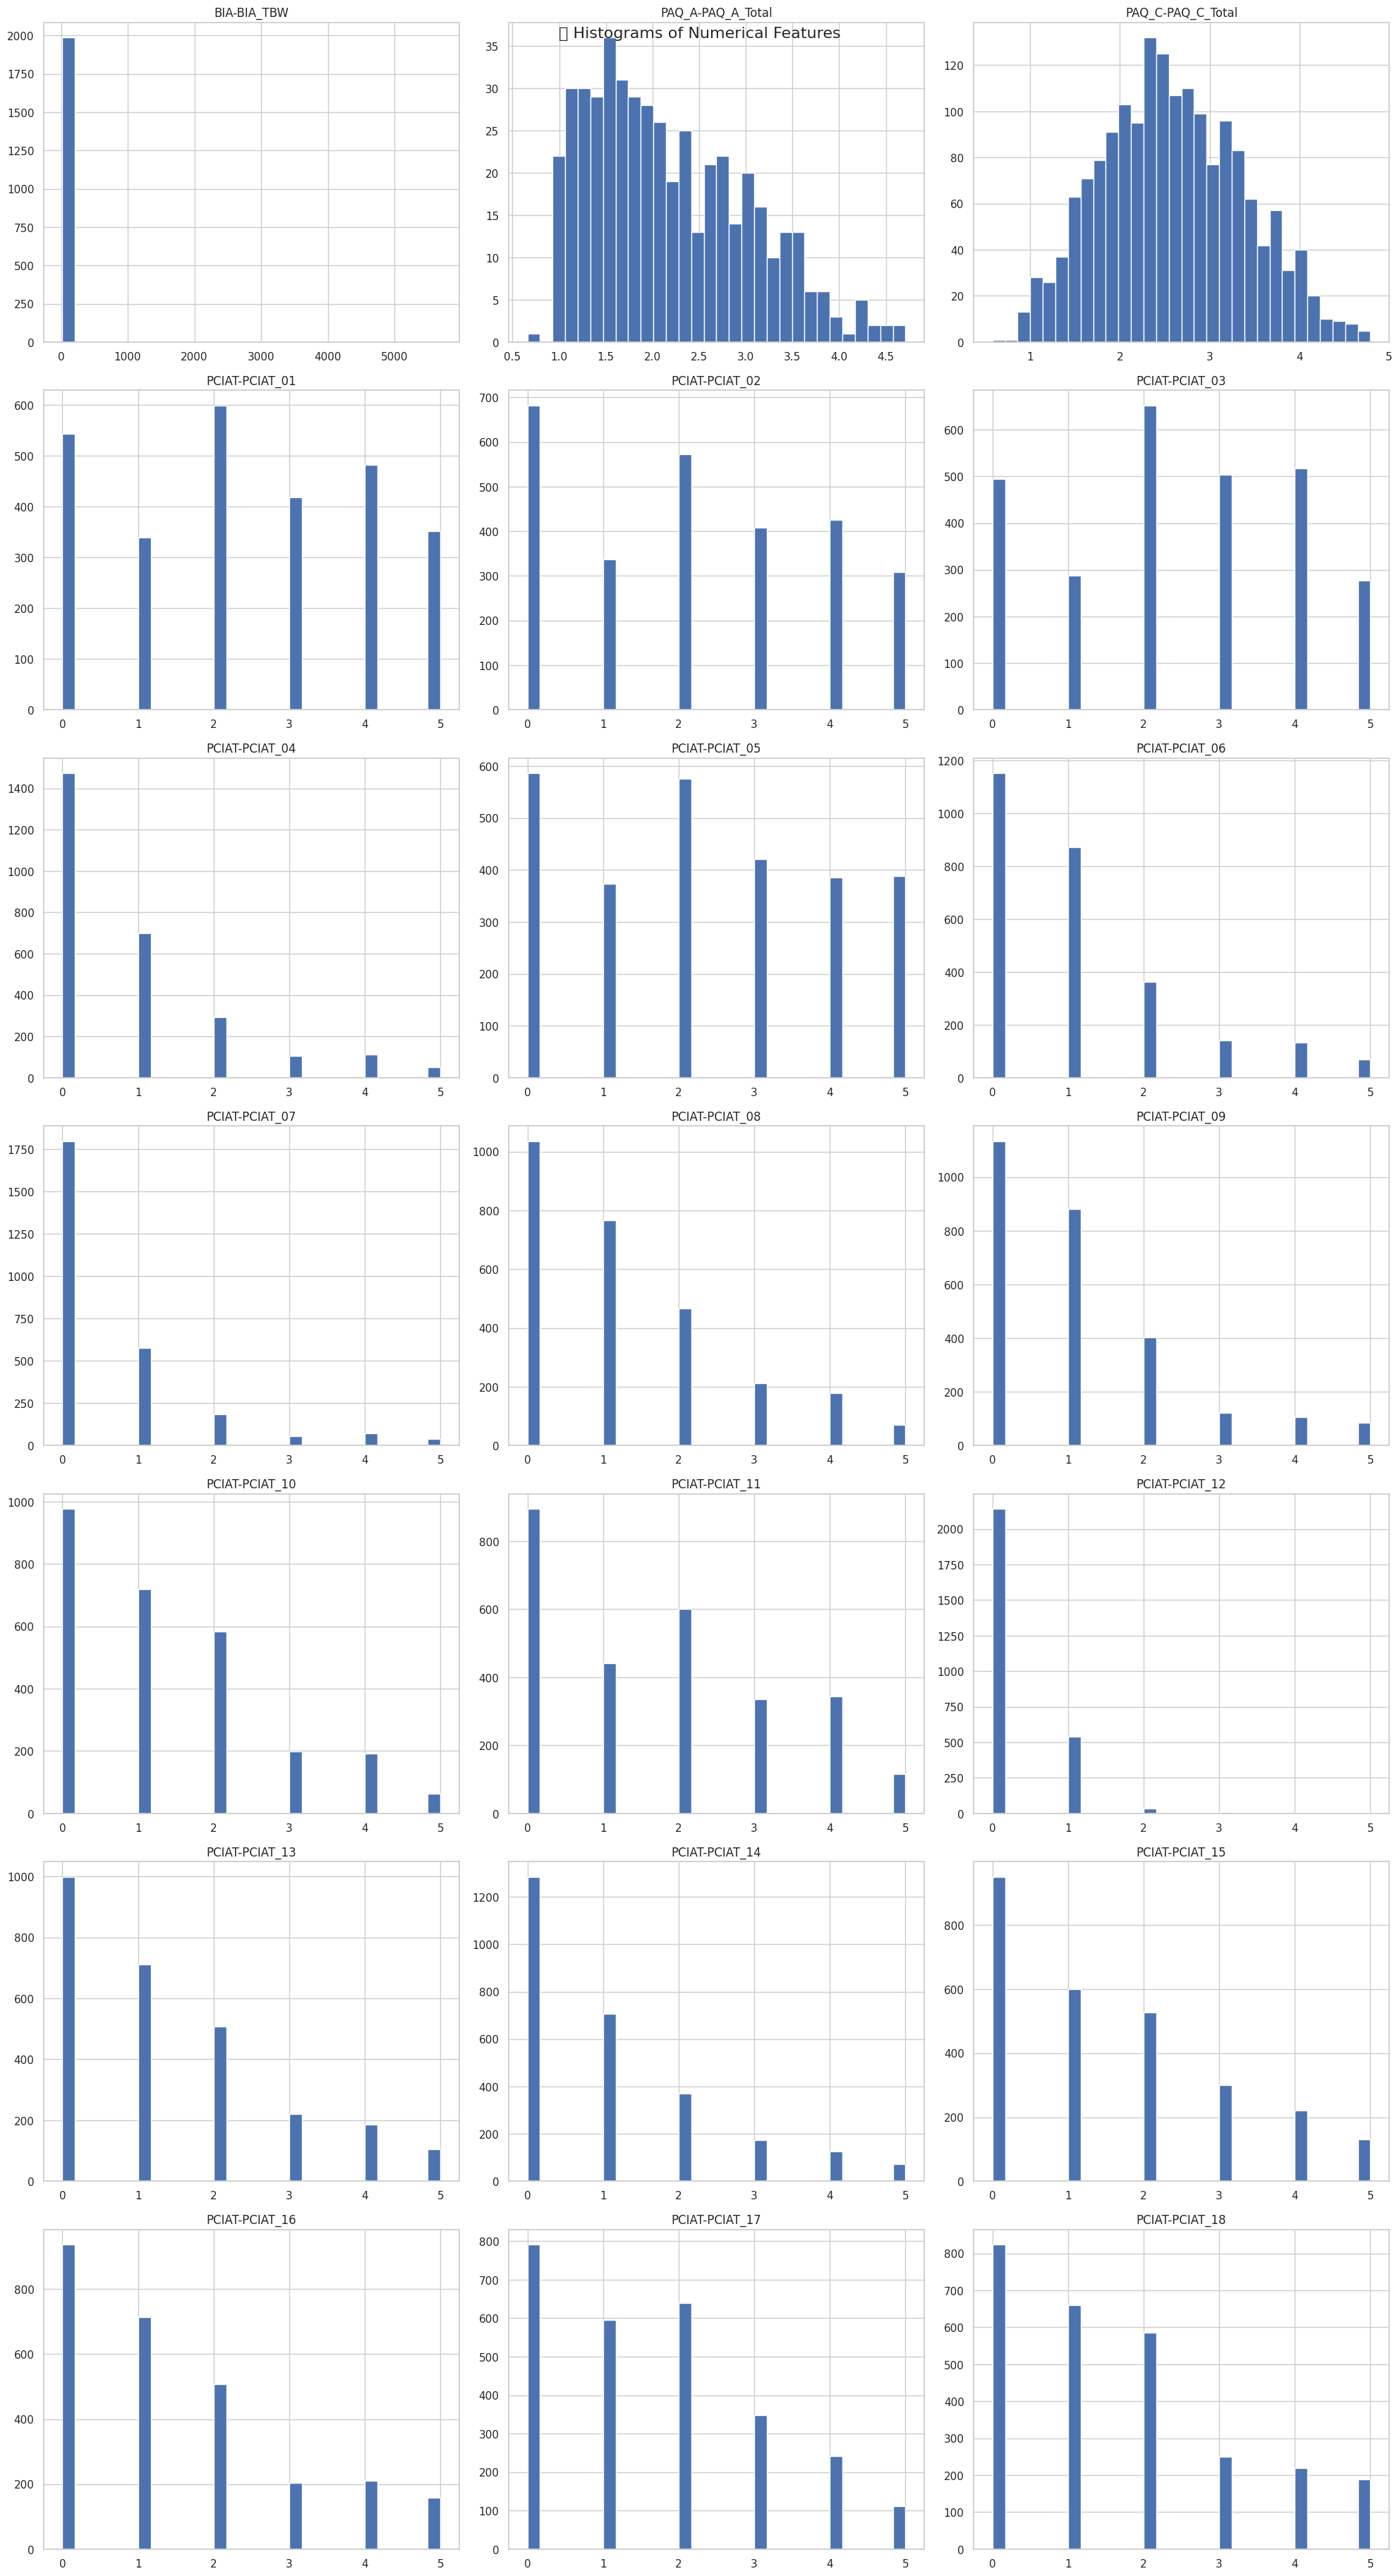

In [242]:
# Plot Histograms for Numerical Data
fig_height = len(numerical_cols[42:63]) * 2 
plt.figure(figsize=(20, fig_height))
df[numerical_cols[42:63]].hist(bins=30, figsize=(20, fig_height), layout=(len(numerical_cols[42:63])//3 + 1, 3))
plt.suptitle("📊 Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


<ipython-input-243-777209804396>:6: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()


<Figure size 2000x1400 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


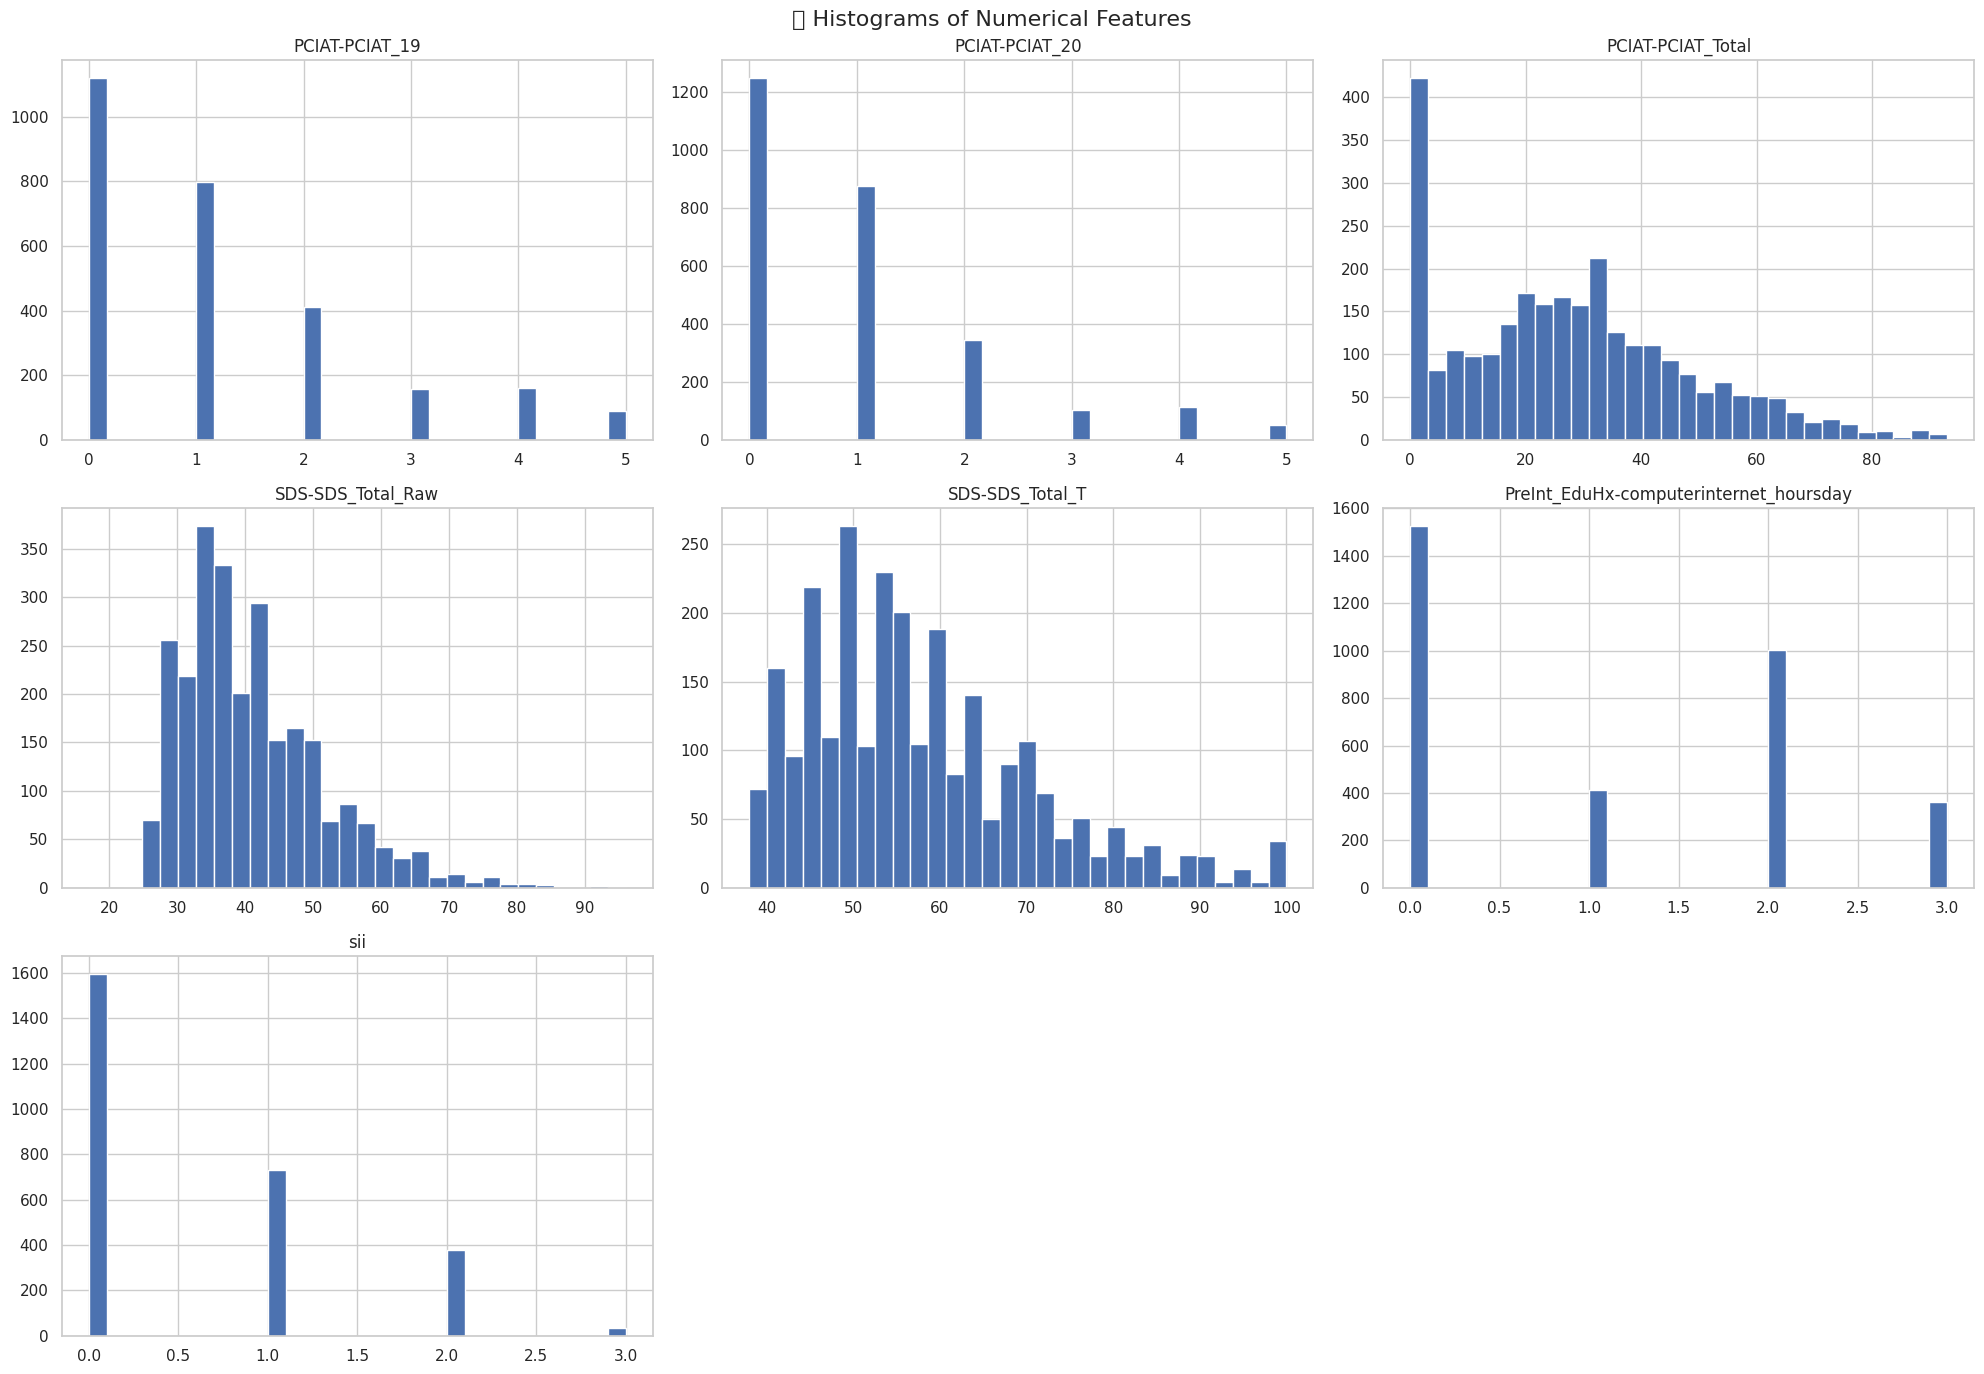

In [243]:
# Plot Histograms for Numerical Data
fig_height = len(numerical_cols[63:]) * 2 
plt.figure(figsize=(20, fig_height))
df[numerical_cols[63:]].hist(bins=30, figsize=(20, fig_height), layout=(len(numerical_cols[63:])//3 + 1, 3))
plt.suptitle("📊 Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


In [244]:
# # Displays the minimum and maximum values of the PCIAT-PCIAT_Total column for each sii group.
# display(df.groupby('sii').min()['PCIAT-PCIAT_Total'])
# display(df.groupby('sii').max()['PCIAT-PCIAT_Total'])

In [245]:
## Correlation
covariance_matrix = df.select_dtypes(include=['float64','int64']).corr()
display(covariance_matrix)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
Basic_Demos-Age,1.000000,0.064004,-0.009994,0.492112,0.880274,0.748149,0.609601,0.107960,-0.218527,0.263875,...,0.085805,0.286888,0.159826,0.303259,0.286309,0.409559,0.037317,0.037115,0.441822,0.365990
Basic_Demos-Sex,0.064004,1.000000,0.075470,0.025793,-0.014454,0.003245,-0.020013,0.002076,0.026675,-0.025256,...,-0.097824,-0.102390,-0.110080,-0.104911,-0.067966,-0.093648,-0.020122,-0.018508,-0.000579,-0.100148
CGAS-CGAS_Score,-0.009994,0.075470,1.000000,-0.094074,-0.023185,-0.076399,-0.076116,-0.005292,-0.010108,-0.021392,...,-0.065687,-0.047770,-0.067922,-0.065210,-0.067920,-0.070542,-0.145369,-0.148457,-0.021596,-0.085261
Physical-BMI,0.492112,0.025793,-0.094074,1.000000,0.487097,0.865662,0.892149,0.141795,-0.036955,0.312045,...,0.071017,0.152122,0.100032,0.181208,0.161034,0.240858,0.087655,0.086185,0.296709,0.221125
Physical-Height,0.880274,-0.014454,-0.023185,0.487097,1.000000,0.833844,0.688033,0.115724,-0.217080,0.299157,...,0.112369,0.300590,0.184409,0.307084,0.292542,0.420765,0.036687,0.036478,0.399367,0.373530
Physical-Weight,0.748149,0.003245,-0.076399,0.865662,0.833844,1.000000,0.916710,0.145480,-0.134071,0.355700,...,0.095449,0.236919,0.148172,0.264149,0.245022,0.353048,0.075098,0.073482,0.375851,0.325938
Physical-Waist_Circumference,0.609601,-0.020013,-0.076116,0.892149,0.688033,0.916710,1.000000,0.195975,-0.090119,0.388621,...,0.060389,0.217028,0.135397,0.254455,0.212407,0.327013,0.089831,0.091152,0.371418,0.272885
Physical-Diastolic_BP,0.107960,0.002076,-0.005292,0.141795,0.115724,0.145480,0.195975,1.000000,0.148024,0.657705,...,0.015915,0.047003,0.032866,0.049475,0.028275,0.069321,0.006702,0.008502,0.074258,0.050971
Physical-HeartRate,-0.218527,0.026675,-0.010108,-0.036955,-0.217080,-0.134071,-0.090119,0.148024,1.000000,0.122261,...,0.011719,-0.021856,0.006923,-0.006803,-0.034419,-0.037594,0.049194,0.047932,-0.073453,-0.024572
Physical-Systolic_BP,0.263875,-0.025256,-0.021392,0.312045,0.299157,0.355700,0.388621,0.657705,0.122261,1.000000,...,0.048735,0.093580,0.074699,0.101469,0.084332,0.147081,0.036562,0.038317,0.137728,0.135336


In [246]:
numeric_df = train_df.select_dtypes(include='number')

min_max_df = pd.DataFrame({
    'Min': numeric_df.min(),
    'Max': numeric_df.max()
}).sort_values(by='Min', ascending=True)  # or sort by 'Max' if preferred

print(min_max_df)

                                                Min            Max
BIA-BIA_Fat                            -8745.080000     153.820000
BIA-BIA_FMI                             -194.163000      28.251500
BIA-BIA_BMC                               -7.789610    4115.360000
sii                                        0.000000       3.000000
FGC-FGC_TL_Zone                            0.000000       1.000000
PCIAT-PCIAT_10                             0.000000       5.000000
PCIAT-PCIAT_17                             0.000000       5.000000
PCIAT-PCIAT_16                             0.000000       5.000000
PCIAT-PCIAT_15                             0.000000       5.000000
PreInt_EduHx-computerinternet_hoursday     0.000000       3.000000
PCIAT-PCIAT_14                             0.000000       5.000000
PCIAT-PCIAT_13                             0.000000       5.000000
PCIAT-PCIAT_12                             0.000000       5.000000
PCIAT-PCIAT_01                             0.000000       5.00

In [247]:
def clean_data(df):
    
    # season_colums = [col for col in train_df.columns if 'Season' in col]
    # df = df.drop(season_colums, axis=1) # Removes columns with 'Season' in the name

    df = df.drop(columns=['id'])
    
    df["BIA-BIA_Fat"] = df["BIA-BIA_Fat"].abs() # Replaces negative values with positive values

    df["BIA-BIA_FMI"] = df["BIA-BIA_FMI"].abs() # Replaces negative values with positive values

    df.loc[df["BIA-BIA_Fat"] > 65, "BIA-BIA_Fat"] = np.nan # Replaces values greater than 65 with NaN - more than 65% body fat is not possible

    df.loc[df["BIA-BIA_Fat"] < 5, "BIA-BIA_Fat"] = np.nan # Replaces values less than 5 with NaN - less 5% body fat is not possible

    df.loc[df["BIA-BIA_FMI"] > 40, "BIA-BIA_FMI"] = np.nan # Replaces values greater than 40 with NaN

    df[['FGC-FGC_GSND', 'FGC-FGC_GSD']] = df[['FGC-FGC_GSND', 'FGC-FGC_GSD']].clip(lower=0, upper=100) # Replaces values less than 0 with 0 and values greater than 100 with 100

    df.loc[df["BIA-BIA_BMR"] > 4000, "BIA-BIA_BMR"] = np.nan # Replaces values greater than 4000 with NaN

    df.loc[df["BIA-BIA_DEE"] > 8000, "BIA-BIA_DEE"] = np.nan # Replaces values greater than 8000 with NaN

    df["BIA-BIA_BMC"] = df["BIA-BIA_BMC"].abs() # Replaces negative values with positive values

    df[['BIA-BIA_BMC']] = df[['BIA-BIA_BMC']].clip(lower=0, upper=10) # Replaces values less than 0 with 0 and values greater than 10 with 10

    df.loc[df["BIA-BIA_BMC"] == 0, "BIA-BIA_BMC"] = np.nan # Replaces values equal to 0 with NaN

    df.loc[df["BIA-BIA_FFM"] > 400, "BIA-BIA_FFM"] = np.nan # Replaces values greater than 400 with NaN

    df.loc[df["BIA-BIA_ECW"] > 100, "BIA-BIA_ECW"] = np.nan # Replaces values greater than 100 with NaN

    df.loc[df["BIA-BIA_ICW"] > 100, "BIA-BIA_ICW"] = np.nan # Replaces values greater than 100 with NaN

    df.loc[df["BIA-BIA_LDM"] > 100, "BIA-BIA_LDM"] = np.nan # Replaces values greater than 100 with NaN

    df.loc[df["BIA-BIA_LST"] > 300, "BIA-BIA_LST"] = np.nan # Replaces values greater than 300 with NaN

    df.loc[df["BIA-BIA_TBW"] > 300, "BIA-BIA_TBW"] = np.nan # Replaces values greater than 300 with NaN

    df.loc[df["BIA-BIA_SMM"] > 300, "BIA-BIA_SMM"] = np.nan # Replaces values greater than 300 with NaN

    df.loc[df["Physical-Height"] == 0, "Physical-Height"] = np.nan # Replaces values equal to 0 with NaN

    df.loc[df["Physical-Weight"] == 0, "Physical-Weight"] = np.nan # Replaces values equal to 0 with NaN
    df.loc[df['CGAS-CGAS_Score'] == 999, 'CGAS-CGAS_Score'] = np.nan #Replace the single outlier CGAS Score with NAN


    df['PAQ_Total'] = df['PAQ_C-PAQ_C_Total'].fillna(df['PAQ_A-PAQ_A_Total']) # Fills missing values in PAQ_Total with values from PAQ_A-PAQ_A_Total

    df = df.drop('PAQ_C-PAQ_C_Total', axis=1) 
    df = df.drop('PAQ_A-PAQ_A_Total', axis=1)

    return df

train_df = clean_data(train_df)
test_df = clean_data(test_df) 

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expres

In [248]:
# Quick function to display the statistics of a column
def get_statistic(df_col):
    print(df_col.describe())

def assign_groups(age):
    thresholds = [5, 10, 15, 18, 22]  # Define the thresholds based on the age groups.
    for i, j in enumerate(thresholds):
        if age <= j:
            return i
    return np.nan

def group_statistics(df, column):
    mean_value = df.groupby('age_group')[column].mean() # Calculate the mean value of the column for each age group.
    print(mean_value)

train_df['age_group'] = train_df['Basic_Demos-Age'].apply(assign_groups) # Apply the function to the 'Demographics-Age' column.
test_df['age_group'] = test_df['Basic_Demos-Age'].apply(assign_groups) # Apply the function to the 'Demographics-Age' column.



In [249]:
pd.reset_option('display.max_rows')

In [250]:
train_df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,...,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii,PAQ_Total,age_group
0,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,...,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0,NaN,0
1,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,...,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0,2.340,1
2,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,...,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0,2.170,1
3,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,...,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0,2.451,1
4,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.040,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,NaN,...,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0,3.260,2
3956,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,27.0,...,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN,2.340,1
3957,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,NaN,...,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0,2.729,2
3958,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,NaN,...,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0,3.300,2


In [251]:
pd.set_option('display.max_rows', None)

missing_cols = train_df.isna().sum()
missing_cols = missing_cols[missing_cols > 0]
print(missing_cols)

CGAS-Season                               1405
CGAS-CGAS_Score                           1540
Physical-Season                            650
Physical-BMI                               938
Physical-Height                            933
Physical-Weight                            945
Physical-Waist_Circumference              3062
Physical-Diastolic_BP                     1006
Physical-HeartRate                         993
Physical-Systolic_BP                      1006
Fitness_Endurance-Season                  2652
Fitness_Endurance-Max_Stage               3217
Fitness_Endurance-Time_Mins               3220
Fitness_Endurance-Time_Sec                3220
FGC-Season                                 614
FGC-FGC_CU                                1638
FGC-FGC_CU_Zone                           1678
FGC-FGC_GSND                              2886
FGC-FGC_GSND_Zone                         2898
FGC-FGC_GSD                               2886
FGC-FGC_GSD_Zone                          2897
FGC-FGC_PU   

In [252]:
corr = pd.DataFrame(train_df.select_dtypes(include='number').corr()['PCIAT-PCIAT_Total'].sort_values(ascending = False))
corr

,PCIAT-PCIAT_Total
PCIAT-PCIAT_Total,1.000000
sii,0.899681
PCIAT-PCIAT_05,0.830993
PCIAT-PCIAT_15,0.823996
PCIAT-PCIAT_17,0.823708
PCIAT-PCIAT_03,0.823336
PCIAT-PCIAT_18,0.802030
PCIAT-PCIAT_02,0.788802
PCIAT-PCIAT_13,0.771990
PCIAT-PCIAT_08,0.770499


## **Imputations**

#### Height and Weight using KNN Imputation

In [253]:
# 1. Get all columns with missing values
missing_cols = train_df.columns[train_df.isna().any()]

# 2. Get the correlation matrix (numeric columns only)
corr_matrix = train_df.corr(numeric_only=True)

# 3. Define your target columns
target_cols = ['Physical-Height', 'Physical-Weight']

# 4. Find non-missing columns
non_missing_cols = [col for col in train_df.columns if col not in missing_cols]

# 5. For each target, get sorted correlations with non-missing columns
for target in target_cols:
    print(f"\nTop correlated non-missing columns with {target}:\n")
    if target not in corr_matrix:
        print("No correlation available (likely too many NaNs).")
        continue
    correlations = corr_matrix[target].dropna()
    correlations = correlations[correlations.index.isin(non_missing_cols) & (correlations.index != target)]
    print(f"Found {len(correlations)} valid correlations")
    print(correlations.sort_values(ascending=False).head(10))


Top correlated non-missing columns with Physical-Height:

Found 3 valid correlations
Basic_Demos-Age    0.880274
age_group          0.792613
Basic_Demos-Sex   -0.014454
Name: Physical-Height, dtype: float64

Top correlated non-missing columns with Physical-Weight:

Found 3 valid correlations
Basic_Demos-Age    0.781934
age_group          0.725087
Basic_Demos-Sex    0.003113
Name: Physical-Weight, dtype: float64


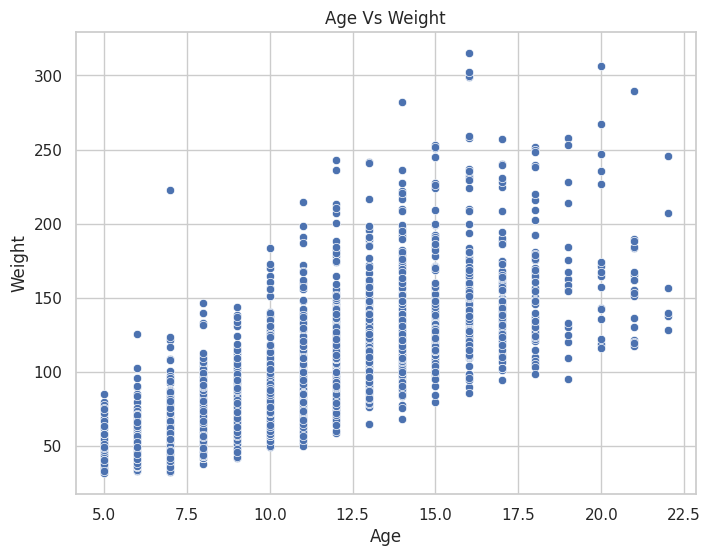

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=train_df,
    x='Basic_Demos-Age',
    y='Physical-Weight'
)
plt.title('Age Vs Weight')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.grid(True)
plt.show()

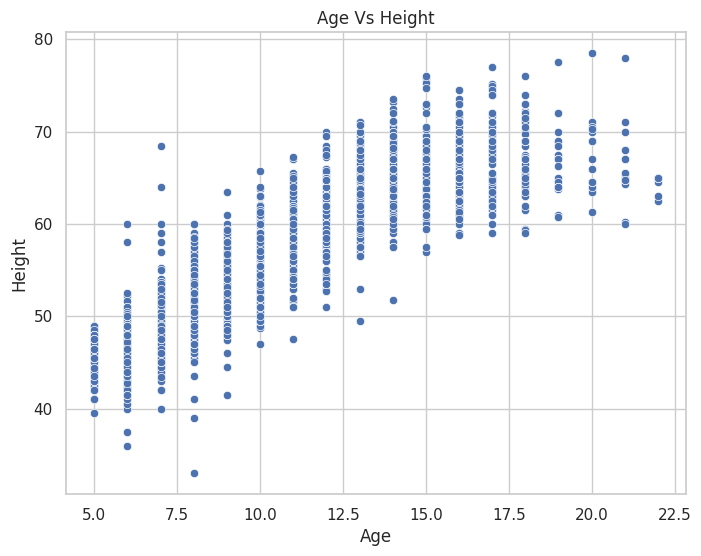

In [255]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=train_df,
    x='Basic_Demos-Age',
    y='Physical-Height'
)
plt.title('Age Vs Height')
plt.xlabel('Age')
plt.ylabel('Height')
plt.grid(True)
plt.show()

In [256]:
train_df['Physical-Height'].min()

33.0

In [257]:
columns = ['Physical-Height', 'Physical-Weight', 'Basic_Demos-Age', 'Basic_Demos-Sex']

# Select only these columns for imputation
subset = train_df[columns]

# Run KNN imputation
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
imputed = pd.DataFrame(imputer.fit_transform(subset), columns=columns)

# Replace the imputed columns in the original dataframe
train_df['Physical-Height'] = imputed['Physical-Height']
train_df['Physical-Weight'] = imputed['Physical-Weight']

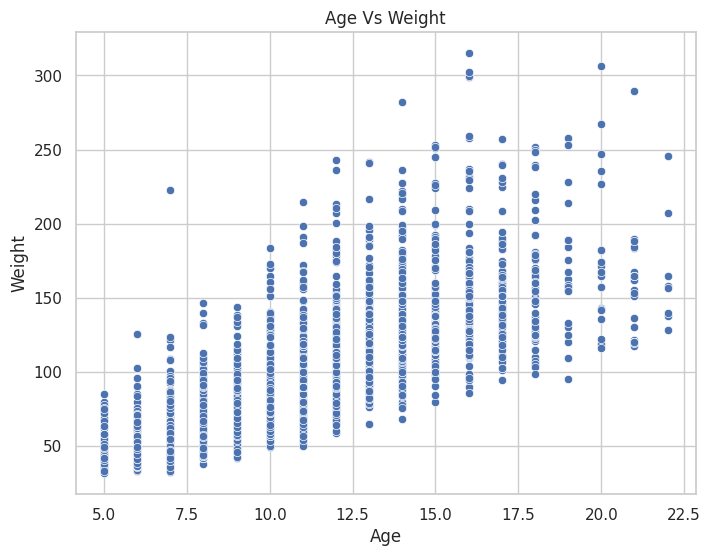

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=train_df,
    x='Basic_Demos-Age',
    y='Physical-Weight'
)
plt.title('Age Vs Weight')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.grid(True)
plt.show()

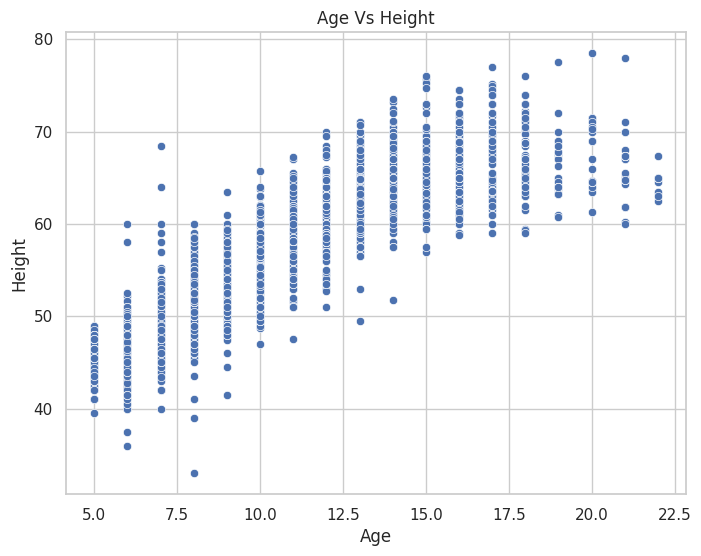

In [259]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=train_df,
    x='Basic_Demos-Age',
    y='Physical-Height'
)
plt.title('Age Vs Height')
plt.xlabel('Age')
plt.ylabel('Height')
plt.grid(True)
plt.show()

#### Imputing BMI using height and weight

In [260]:
train_df['Physical-Weight'] = train_df['Physical-Weight'] * 0.453592 

In [261]:
train_df['Physical-Height'] = train_df['Physical-Height'] * 0.0254

In [262]:
mask = train_df['Physical-Weight'].notna() & train_df['Physical-Height'].notna()

# Overwrite full BMI column with NaNs first
train_df['Physical-BMI'] = np.nan

# Fill only where data is available
train_df.loc[mask, 'Physical-BMI'] = (
    train_df.loc[mask, 'Physical-Weight'] / (train_df.loc[mask, 'Physical-Height'] ** 2)
)

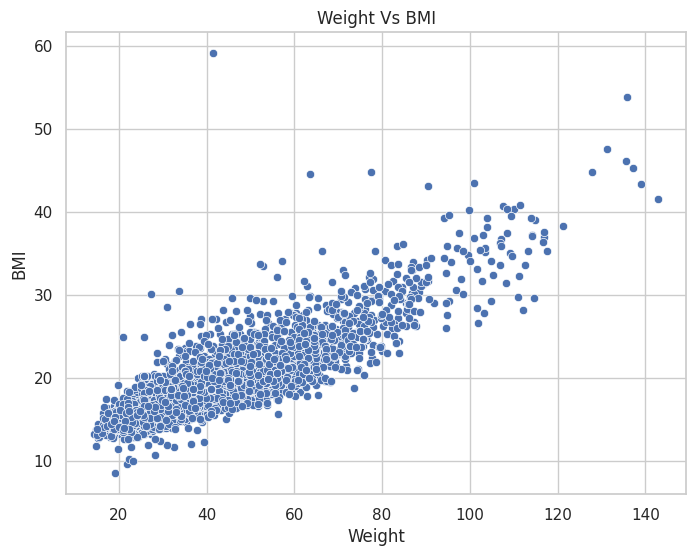

In [263]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=train_df,
    x='Physical-Weight',
    y='Physical-BMI'
)
plt.title('Weight Vs BMI')
plt.xlabel('Weight')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

In [264]:
train_df = train_df.drop(columns=['BIA-BIA_BMI'])

#### Impute waist circumference using linear regression

In [265]:
# 1. Get all columns with missing values
missing_cols = train_df.columns[train_df.isna().any()]

# 2. Get the correlation matrix (numeric columns only)
corr_matrix = train_df.corr(numeric_only=True)

# 3. Define your target columns
target_cols = ['Physical-Waist_Circumference']

# 4. Find non-missing columns
non_missing_cols = [col for col in train_df.columns if col not in missing_cols]

# 5. For each target, get sorted correlations with non-missing columns
for target in target_cols:
    print(f"\nTop correlated non-missing columns with {target}:\n")
    if target not in corr_matrix:
        print("No correlation available (likely too many NaNs).")
        continue
    correlations = corr_matrix[target].dropna()
    correlations = correlations[correlations.index.isin(non_missing_cols) & (correlations.index != target)]
    print(f"Found {len(correlations)} valid correlations")
    print(correlations.sort_values(ascending=False).head(10))


Top correlated non-missing columns with Physical-Waist_Circumference:

Found 6 valid correlations
Physical-Weight    0.915839
Physical-BMI       0.891014
Physical-Height    0.688211
Basic_Demos-Age    0.609601
age_group          0.562547
Basic_Demos-Sex   -0.020013
Name: Physical-Waist_Circumference, dtype: float64


In [266]:
columns = ['Physical-Weight', 'Physical-BMI', 'Physical-Waist_Circumference']

# Select only these columns for imputation
subset = train_df[columns]

# Run linear regression imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

imputer = IterativeImputer(estimator=BayesianRidge())
imputed = pd.DataFrame(imputer.fit_transform(subset),columns=columns)

# Replace the imputed columns in the original dataframe
train_df['Physical-Waist_Circumference'] = imputed['Physical-Waist_Circumference']

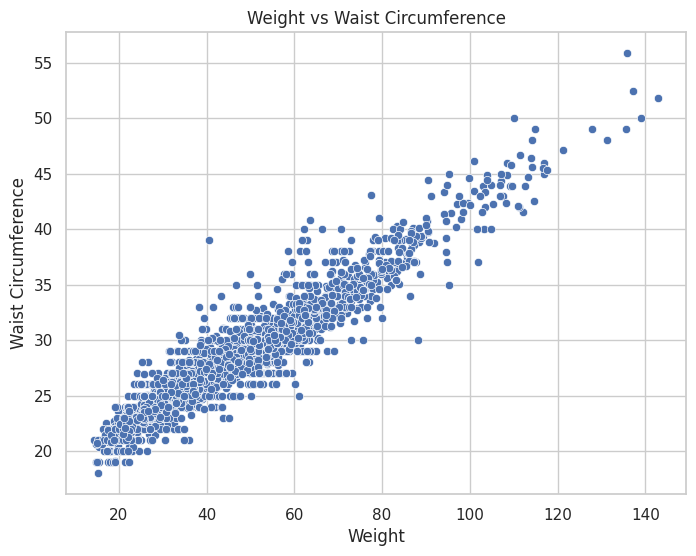

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=train_df,
    x='Physical-Weight',
    y='Physical-Waist_Circumference'
)
plt.title('Weight vs Waist Circumference')
plt.xlabel('Weight')
plt.ylabel('Waist Circumference')
plt.grid(True)
plt.show()

In [268]:
train_df['Physical-Waist_Circumference'].isna().sum()

0

#### Imputing SDS-Total-Raw using KNN Imputation


In [269]:
equal_mask = train_df['SDS-SDS_Total_T'] == train_df['SDS-SDS_Total_Raw']
print(f"{equal_mask.sum()} records have equal values.")

0 records have equal values.


In [270]:
train_df['SDS_Diff'] = train_df['SDS-SDS_Total_T'] - train_df['SDS-SDS_Total_Raw']
train_df['SDS_Diff']

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


0        NaN
1       18.0
2       16.0
3       14.0
4        NaN
5       16.0
6       13.0
7        NaN
8        NaN
9        NaN
10       NaN
11      17.0
12      14.0
13       NaN
14       NaN
15      15.0
16      16.0
17       NaN
18      16.0
19       NaN
20      13.0
21       NaN
22      20.0
23      19.0
24      15.0
25      13.0
26       NaN
27      16.0
28      15.0
29       NaN
30       NaN
31      13.0
32      24.0
33       NaN
34       NaN
35       NaN
36      16.0
37       NaN
38      25.0
39       NaN
40      19.0
41      19.0
42       NaN
43       NaN
44      14.0
45      15.0
46      17.0
47       NaN
48      14.0
49      16.0
50      17.0
51      18.0
52      15.0
53      15.0
54      13.0
55      16.0
56      20.0
57      19.0
58      14.0
59       NaN
60      15.0
61      17.0
62      19.0
63      15.0
64      19.0
65       NaN
66      19.0
67       NaN
68       NaN
69       NaN
70      15.0
71       NaN
72      14.0
73       NaN
74       NaN
75      14.0
76       NaN

In [271]:
train_df.describe()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii,PAQ_Total,age_group,SDS_Diff
count,3960.000000,3960.000000,2420.000000,3960.000000,3960.000000,3960.000000,3960.000000,2954.000000,2967.000000,2954.000000,...,2730.000000,2733.000000,2736.000000,2609.000000,2606.000000,3301.000000,2736.000000,2195.000000,3960.000000,2606.000000
mean,10.433586,0.372727,65.069008,19.570778,1.424915,41.685607,27.155470,69.648951,81.597236,116.983074,...,1.158974,0.943652,27.896199,41.088923,57.763622,1.060588,0.580409,2.500820,1.522475,16.685342
std,3.574648,0.483591,11.787310,4.580872,0.187490,18.641519,4.683109,13.611226,13.665196,17.061225,...,1.343661,1.185460,20.338853,10.427433,13.196091,1.094875,0.771122,0.816259,0.781512,2.958185
min,5.000000,0.000000,25.000000,8.523273,0.838200,14.424226,18.000000,0.000000,27.000000,0.000000,...,0.000000,0.000000,0.000000,17.000000,38.000000,0.000000,0.000000,0.580000,0.000000,4.000000
25%,8.000000,0.000000,59.000000,16.425001,1.295400,28.031986,23.983409,61.000000,72.000000,107.000000,...,0.000000,0.000000,12.000000,33.000000,47.000000,0.000000,0.000000,1.880000,1.000000,14.000000
50%,10.000000,0.000000,65.000000,18.679585,1.404620,36.196642,26.000000,68.000000,81.000000,114.000000,...,1.000000,1.000000,26.000000,39.000000,55.000000,1.000000,0.000000,2.460000,1.000000,16.000000
75%,13.000000,1.000000,75.000000,21.586521,1.574800,53.523856,29.623670,76.000000,90.500000,125.000000,...,2.000000,1.000000,41.000000,46.000000,64.000000,2.000000,1.000000,3.090000,2.000000,18.000000
max,22.000000,1.000000,95.000000,59.137852,1.993900,142.881480,55.847379,179.000000,138.000000,203.000000,...,5.000000,5.000000,93.000000,96.000000,100.000000,3.000000,3.000000,4.790000,4.000000,26.000000


In [272]:
train_df = train_df.drop(columns=['SDS_Diff'])

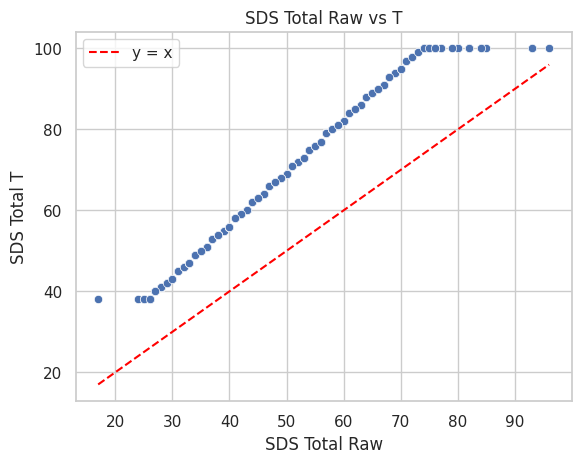

In [273]:
sns.scatterplot(
    x='SDS-SDS_Total_Raw',
    y='SDS-SDS_Total_T',
    data=train_df
)
plt.plot([train_df['SDS-SDS_Total_Raw'].min(), train_df['SDS-SDS_Total_Raw'].max()],
         [train_df['SDS-SDS_Total_Raw'].min(), train_df['SDS-SDS_Total_Raw'].max()],
         color='red', linestyle='--', label='y = x')
plt.legend()
plt.title('SDS Total Raw vs T')
plt.xlabel('SDS Total Raw')
plt.ylabel('SDS Total T')
plt.grid(True)
plt.show()

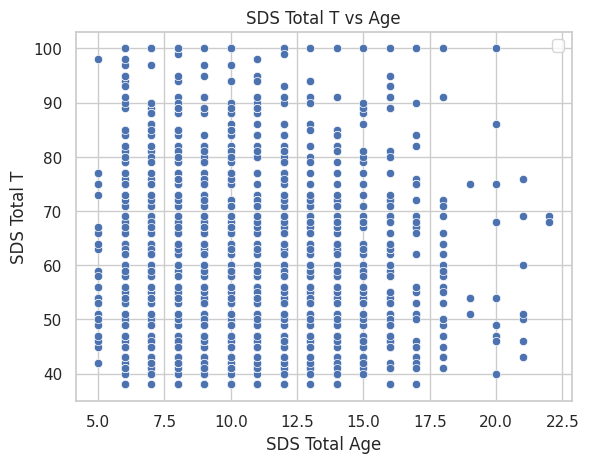

In [274]:
sns.scatterplot(
    x='Basic_Demos-Age',
    y='SDS-SDS_Total_T',
    data=train_df
)

plt.legend()
plt.title('SDS Total T vs Age')
plt.xlabel('SDS Total Age')
plt.ylabel('SDS Total T')
plt.grid(True)
plt.show()

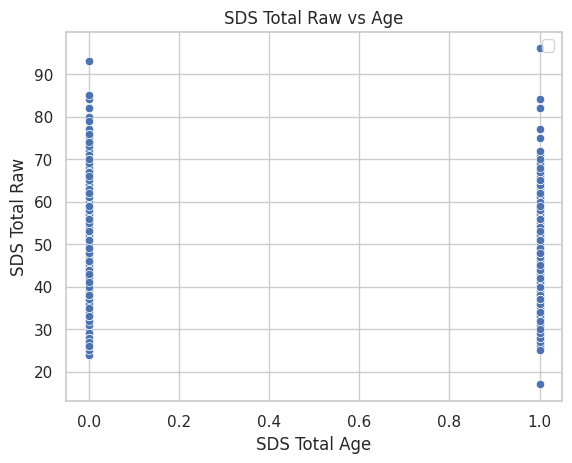

In [275]:
sns.scatterplot(
    x='Basic_Demos-Sex',
    y='SDS-SDS_Total_Raw',
    data=train_df
)

plt.legend()
plt.title('SDS Total Raw vs Age')
plt.xlabel('SDS Total Age')
plt.ylabel('SDS Total Raw')
plt.grid(True)
plt.show()

In [276]:
train_df = train_df.drop(columns=['SDS-SDS_Total_T'])

In [277]:
# 1. Get all columns with missing values
missing_cols = train_df.columns[train_df.isna().any()]

# 2. Get the correlation matrix (numeric columns only)
corr_matrix = train_df.corr(numeric_only=True)

# 3. Define your target columns
target_cols = ['SDS-SDS_Total_Raw']

# 4. Find non-missing columns
non_missing_cols = [col for col in train_df.columns if col not in missing_cols]

# 5. For each target, get sorted correlations with non-missing columns
for target in target_cols:
    print(f"\nTop correlated non-missing columns with {target}:\n")
    if target not in corr_matrix:
        print("No correlation available (likely too many NaNs).")
        continue
    correlations = corr_matrix[target].dropna()
    correlations = correlations[correlations.index.isin(non_missing_cols) & (correlations.index != target)]
    print(f"Found {len(correlations)} valid correlations")
    print(correlations.sort_values(ascending=False).head(10))


Top correlated non-missing columns with SDS-SDS_Total_Raw:

Found 7 valid correlations
Physical-BMI                    0.097060
Physical-Waist_Circumference    0.094212
Physical-Weight                 0.088988
Physical-Height                 0.045744
age_group                       0.041960
Basic_Demos-Age                 0.037317
Basic_Demos-Sex                -0.020122
Name: SDS-SDS_Total_Raw, dtype: float64


In [278]:
columns = ['SDS-SDS_Total_Raw', 'Basic_Demos-Age', 'Basic_Demos-Sex']

# Select only these columns for imputation
subset = train_df[columns]

# Run KNN imputation
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
imputed = pd.DataFrame(imputer.fit_transform(subset), columns=columns)

# Replace the imputed columns in the original dataframe
train_df['SDS-SDS_Total_Raw'] = imputed['SDS-SDS_Total_Raw']

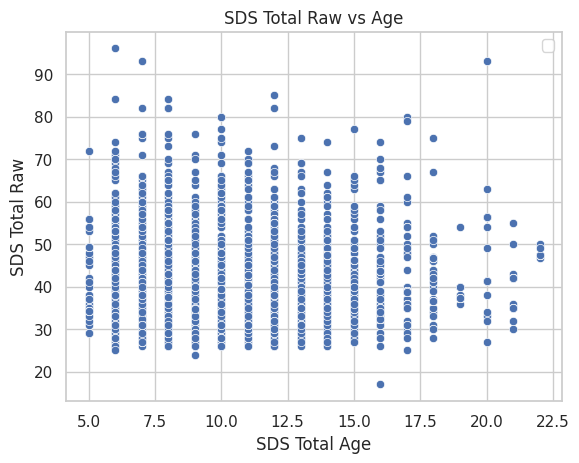

In [279]:
sns.scatterplot(
    x='Basic_Demos-Age',
    y='SDS-SDS_Total_Raw',
    data=train_df
)

plt.legend()
plt.title('SDS Total Raw vs Age')
plt.xlabel('SDS Total Age')
plt.ylabel('SDS Total Raw')
plt.grid(True)
plt.show()

#### Imputing Internet Hours

In [280]:
#quick function for summary data for post and pre imputation
def summarize_data(df, selected_columns=None):
    # Convert single column name to list
    if isinstance(selected_columns, str):
        selected_columns = [selected_columns]
    
    # Use all columns if none specified
    if selected_columns is None:
        selected_columns = df.columns.tolist()
    
    result_tables = []
    
    for column in selected_columns:
        # Get the data for the current column
        col_data = df[column]
        
        # Handle categorical or text data
        if col_data.dtype in ['object', 'category']:
            # Calculate frequencies and percentages
            freq_table = pd.DataFrame()
            values = col_data.value_counts(dropna=False)
            percentages = col_data.value_counts(dropna=False, normalize=True) * 100
            
            # Combine counts and percentages
            freq_table['count (%)'] = [
                f"{count} ({percentage:.2f}%)" 
                for count, percentage in zip(values, percentages)
            ]
            
            result_tables.append(freq_table)
        
        # Handle numerical data
        else:
            # Get descriptive statistics
            num_stats = pd.DataFrame()
            
            # Add basic statistics as a row
            descriptives = col_data.describe().to_dict()
            num_stats = pd.DataFrame(descriptives, index=[0])
            
            # Add missing values count
            num_stats['missing'] = col_data.isna().sum()
            
            # Set index name
            num_stats.index = [column]
            
            result_tables.append(num_stats)
    
    # Combine all results
    combined_stats = pd.concat(result_tables)
    
    return combined_stats

In [281]:
summarize_data(train_df, ['PreInt_EduHx-computerinternet_hoursday'])


,count,mean,std,min,25%,50%,75%,max,missing
PreInt_EduHx-computerinternet_hoursday,3301.0,1.060588,1.094875,0.0,0.0,1.0,2.0,3.0,659


In [282]:
internet_data_age = train_df[train_df['PreInt_EduHx-computerinternet_hoursday'].notna()]
age_range = internet_data_age['Basic_Demos-Age']
print(
    f"Range of Age for those who have internet usage data calculated/already exisiting within our initial data:"
    f" {age_range.min()} - {age_range.max()} years"
)

Range of Age for those who have internet usage data calculated/already exisiting within our initial data: 5 - 22 years


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


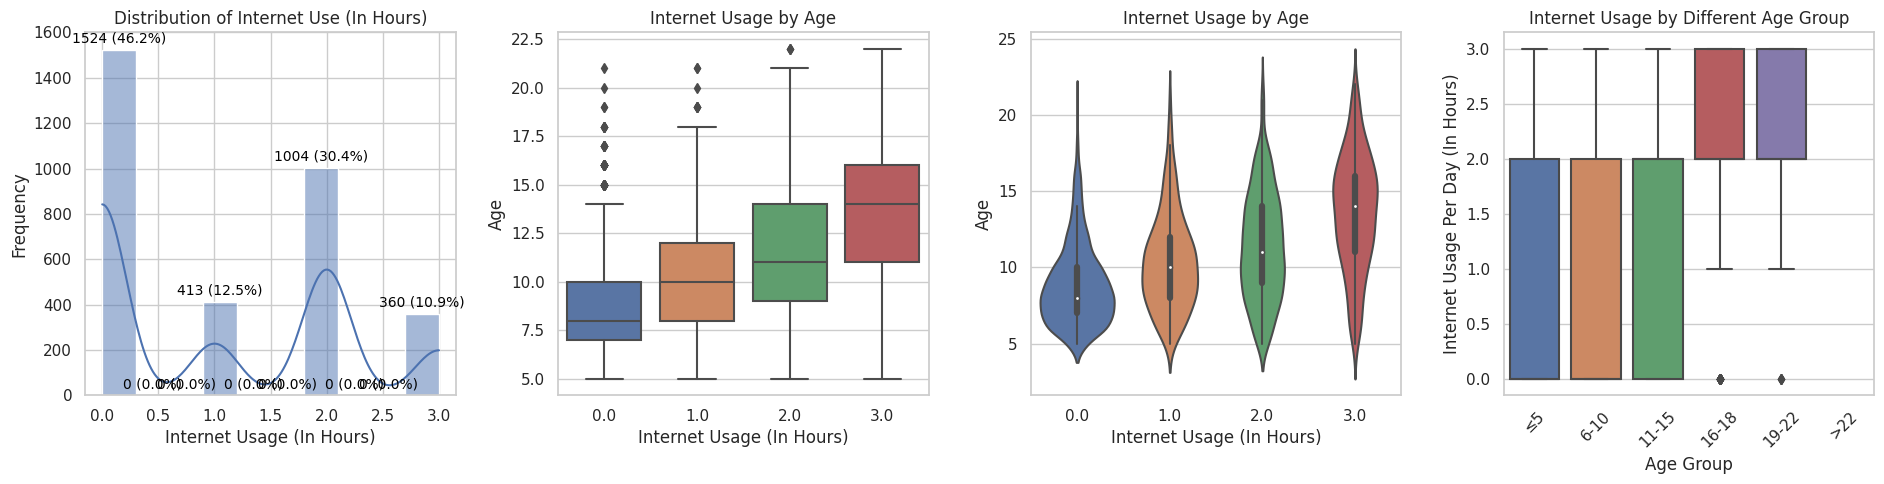

In [283]:
fig, axes = plt.subplots(1, 4, figsize=(19, 5))
ax = axes.ravel()

# Internet usage hours distribution
sns.histplot(data=train_df, x='PreInt_EduHx-computerinternet_hoursday', ax=ax[0], bins=10, kde=True)
ax[0].set_title('Distribution of Internet Use (In Hours)')
ax[0].set_xlabel('Internet Usage (In Hours)')
ax[0].set_ylabel('Frequency')
train_beforeimpute = train_df.copy()
train_internet = train_df.copy()
# Add count and percentage labels to the histogram
total = len(train_internet['PreInt_EduHx-computerinternet_hoursday'].dropna())
for i, p in enumerate(ax[0].patches):
    count = int(p.get_height())
    percentage = '{:.1f}%'.format(100 * count / total)
    ax[0].annotate(f'{count} ({percentage})', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                 textcoords='offset points')

# Internet usage by Age (boxplot)
sns.boxplot(data=train_df, x='PreInt_EduHx-computerinternet_hoursday', y='Basic_Demos-Age', ax=ax[1])
ax[1].set_title('Internet Usage by Age')
ax[1].set_ylabel('Age')
ax[1].set_xlabel('Internet Usage (In Hours)')

# Internet usage by Age (violin plot)
sns.violinplot(data=train_df, x='PreInt_EduHx-computerinternet_hoursday', y='Basic_Demos-Age', ax=ax[2])
ax[2].set_title('Internet Usage by Age')
ax[2].set_ylabel('Age')
ax[2].set_xlabel('Internet Usage (In Hours)')

# Create age group labels based on the thresholds from your assign_groups function
thresholds = [5, 10, 15, 18, 22]
age_group_labels = [f"≤{thresholds[0]}", 
                    f"{thresholds[0]+1}-{thresholds[1]}", 
                    f"{thresholds[1]+1}-{thresholds[2]}", 
                    f"{thresholds[2]+1}-{thresholds[3]}", 
                    f"{thresholds[3]+1}-{thresholds[4]}", 
                    f">{thresholds[4]}"]

# Map numeric age_group to labels
train_df['age_group_label'] = train_df['age_group'].map(
    {i: label for i, label in enumerate(age_group_labels)}
)

# Internet usage by Age Group (boxplot)
sns.boxplot(data=train_df, x='age_group_label', y='PreInt_EduHx-computerinternet_hoursday', ax=ax[3], 
            order=age_group_labels)
ax[3].set_title('Internet Usage by Different Age Group')
ax[3].set_ylabel('Internet Usage Per Day (In Hours)')
ax[3].set_xlabel('Age Group')
ax[3].set_xticklabels(ax[3].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

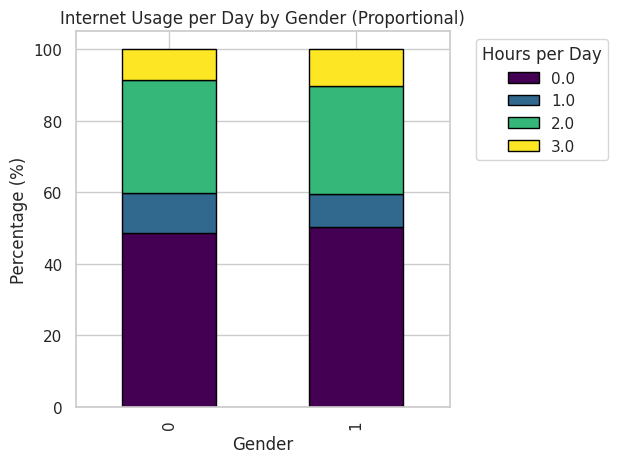

In [289]:


# Recreate proportion stats for plotting
stats_raw = train_df.groupby(['Basic_Demos-Sex', 'PreInt_EduHx-computerinternet_hoursday']).size().unstack(fill_value=0)
stats_prop = stats_raw.div(stats_raw.sum(axis=1), axis=0) * 100

# Plot: Stacked Bar Chart
plt.figure(figsize=(10, 6))
stats_prop.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black')

plt.title("Internet Usage per Day by Gender (Proportional)")
plt.xlabel("Gender")
plt.ylabel("Percentage (%)")
plt.legend(title="Hours per Day", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [284]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
# SDS-SDS_Total_Raw'
# Define predictor columns (excluding 'Season') and the target variable
internet_hours_impute_features = ['Basic_Demos-Age', 'Basic_Demos-Sex', 'SDS-SDS_Total_Raw']
target_column = 'PreInt_EduHx-computerinternet_hoursday'

# Check for missing values in the features
missing_summary = train_df[internet_hours_impute_features].isna().sum()

# Filter and print only the columns with missing values
missing_columns = missing_summary[missing_summary > 0]
print("Columns with NaN values in training features:")
print(missing_columns)

missing_count = train_df[target_column].isna().sum()
print(f"Missing values in target column '{target_column}': {missing_count}")

# Select rows with known target values for training
training_subset = train_df[train_df[target_column].notna()]
X_train_data = training_subset[internet_hours_impute_features]
y_train_data = training_subset[target_column]

# Define a transformer pipeline for preprocessing
transform_pipeline = ColumnTransformer(
    transformers=[
        ('numeric', 'passthrough', internet_hours_impute_features)
    ]
)

# Combine preprocessing with a logistic regression model
prediction_model = Pipeline(steps=[
    ('transform', transform_pipeline),
    ('logistic_model', LogisticRegression(max_iter=1000, multi_class='ovr'))
])

# Train the model using the available data
prediction_model.fit(X_train_data, y_train_data)


train_missing = train_df[train_df[target_column].isna()][internet_hours_impute_features]
print(train_missing.head())
predicted_values = prediction_model.predict(train_missing)

train_df.loc[train_df[target_column].isna(), target_column] = predicted_values


# # Predict missing values in the training dataset
# train_missing = train_df[train_df[target_column].isna()]
# print(train_missing.head())
# train_df.loc[train_df[target_column].isna(), target_column] = prediction_model.predict(train_missing[internet_hours_impute_features])

# # Predict and update missing values in the test dataset
# test_missing = test_df[test_df[target_column].isna()]
# test_df.loc[test_df[target_column].isna(), target_column] = prediction_model.predict(test_missing[internet_hours_impute_features])




Columns with NaN values in training features:
Series([], dtype: int64)
Missing values in target column 'PreInt_EduHx-computerinternet_hoursday': 659
    Basic_Demos-Age  Basic_Demos-Sex  SDS-SDS_Total_Raw
4                18                1          36.666667
9                19                1          40.000000
10               11                1          42.666667
13               12                0          38.000000
29                8                0          37.666667


In [285]:
# Call function to evaluate the updated training data
summarize_data(train_df, [target_column])

,count,mean,std,min,25%,50%,75%,max,missing
PreInt_EduHx-computerinternet_hoursday,3960.0,1.003788,1.083871,0.0,0.0,1.0,2.0,3.0,0


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


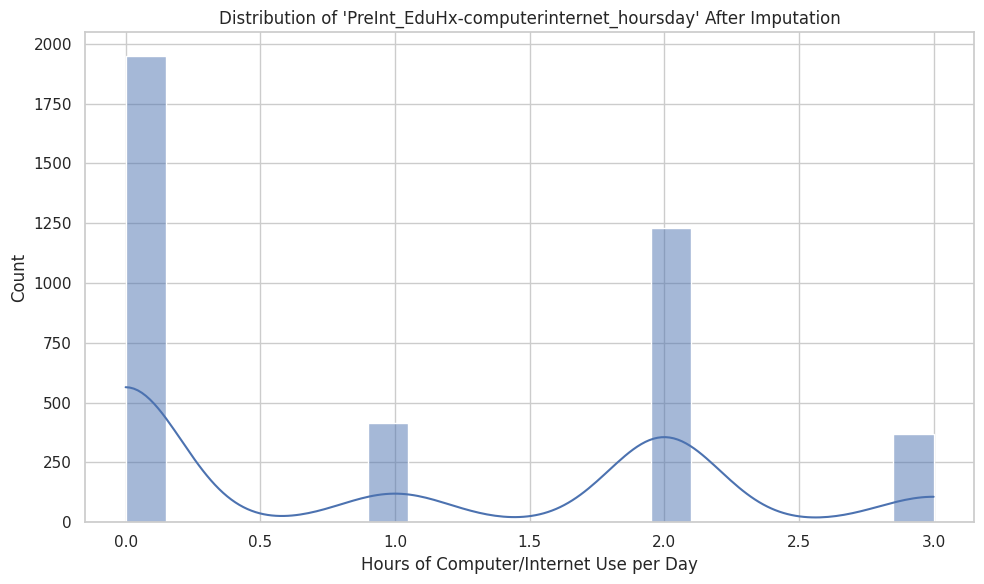

In [286]:
# Set the plot style
sns.set(style="whitegrid")

# Plot the distribution of the target column after imputation
plt.figure(figsize=(10, 6))
sns.histplot(train_df[target_column], bins=20, kde=True)

plt.title(f"Distribution of '{target_column}' After Imputation")
plt.xlabel("Hours of Computer/Internet Use per Day")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [294]:

#Internet Usage Feature Engineer based on normalized values and then direct multiplication with age (can drop other columns as needed )
from sklearn.preprocessing import MinMaxScaler

# Select the features to normalize
features_to_normalize = ['Basic_Demos-Age', 'PreInt_EduHx-computerinternet_hoursday']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the features
normalized_features = scaler.fit_transform(train_df[features_to_normalize])

#Add the normalized features to the dataframe
train_df['norm_age'] = normalized_features[:, 0]
train_df['norm_internet_usage'] = normalized_features[:, 1]

# Create the multiplication feature
train_df['norm_age_internet_product'] = train_df['norm_age'] * train_df['norm_internet_usage']



# Print statistics to verify
print("Statistics for normalized features:")
print(train_df[['norm_age', 'norm_internet_usage', 'norm_age_internet_product']].describe())
train_df = train_df.drop(['norm_age', 'norm_internet_usage'], axis=1)
print(train_df.head())

Statistics for normalized features:
          norm_age  norm_internet_usage  norm_age_internet_product
count  3960.000000          3960.000000                3960.000000
mean      0.319623             0.334596                   0.144499
std       0.210273             0.361290                   0.200430
min       0.000000             0.000000                   0.000000
25%       0.176471             0.000000                   0.000000
50%       0.294118             0.333333                   0.000000
75%       0.470588             0.666667                   0.274510
max       1.000000             1.000000                   1.000000
  Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex CGAS-Season  \
0                      Fall                5                0      Winter   
1                    Summer                9                0         NaN   
2                    Summer               10                1        Fall   
3                    Winter                9         

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


## **Actigraphy Data**

In [287]:
def time_features(df):
    # Convert time_of_day to hours
    df["hours"] = df["time_of_day"] // (3_600 * 1_000_000_000)
    # Basic features 
    features = [
        df["non-wear_flag"].mean(),
        df["enmo"][df["enmo"] >= 0.05].sum(),
    ]
    
    # Define conditions for night, day, and no mask (full data)
    night = ((df["hours"] >= 21) | (df["hours"] <= 5))
    day = ((df["hours"] <= 20) & (df["hours"] >= 6))
    no_mask = np.ones(len(df), dtype=bool)
    
    # List of columns of interest and masks
    keys = ["enmo", "anglez", "light", "battery_voltage"]
    masks = [no_mask, night, day]
    
    # Helper function for feature extraction
    def extract_stats(data):
        return [
            data.mean(), 
            data.std(), 
            data.max(), 
            data.min(), 
            data.diff().mean(), 
            data.diff().std()
        ]
    
    # Iterate over keys and masks to generate the statistics
    for key in keys:
        for mask in masks:
            filtered_data = df.loc[mask, key]
            features.extend(extract_stats(filtered_data))

    return features

def process_file(filename, dirname):
    # Process file and extract time features
    df = pd.read_parquet(os.path.join(dirname, filename, 'part-0.parquet'))
    df.drop('step', axis=1, inplace=True)
    return time_features(df), filename.split('=')[1]

def load_time_series(dirname) -> pd.DataFrame:
    # Load time series from directory in parallel
    ids = os.listdir(dirname)
    
    with ThreadPoolExecutor() as executor:
        results = list(tqdm(executor.map(lambda fname: process_file(fname, dirname), ids), total=len(ids)))
    
    stats, indexes = zip(*results)
    
    df = pd.DataFrame(stats, columns=[f"stat_{i}" for i in range(len(stats[0]))])
    df['id'] = indexes
    
    return df

In [288]:
train_ts = load_time_series("series_train.parquet")


FileNotFoundError: [Errno 2] No such file or directory: 'series_train.parquet'

In [ ]:
test_ts = load_time_series("series_test.parquet")

In [ ]:
# Principal Component Analysis
def perform_pca(train, test, n_components=None, random_state=42):
    
    pca = PCA(n_components=n_components, random_state=random_state)
    train_pca = pca.fit_transform(train)
    test_pca = pca.transform(test)
    
    explained_variance_ratio = pca.explained_variance_ratio_
    print(f"Explained variance ratio of the components:\n {explained_variance_ratio}")
    print(np.sum(explained_variance_ratio))
    
    train_pca_df = pd.DataFrame(train_pca, columns=[f'PC_{i+1}' for i in range(train_pca.shape[1])])
    test_pca_df = pd.DataFrame(test_pca, columns=[f'PC_{i+1}' for i in range(test_pca.shape[1])])
    
    return train_pca_df, test_pca_df, pca

In [ ]:
# Processing the time series data and merging with the main dataset
df_train = train_ts.drop('id', axis=1)
df_test = test_ts.drop('id', axis=1)

scaler = StandardScaler() 
df_train = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns)
df_test = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)

for c in df_train.columns:
    m = np.mean(df_train[c])
    df_train[c].fillna(m, inplace=True)
    df_test[c].fillna(m, inplace=True)

print(df_train.shape)

df_train_pca, df_test_pca, pca = perform_pca(df_train, df_test, n_components=15, random_state=SEED)

df_train_pca['id'] = train_ts['id']
df_test_pca['id'] = test_ts['id']

train = pd.merge(train_df, df_train_pca, how="left", on='id')
test = pd.merge(test_df, df_test_pca, how="left", on='id')
train.shape

In [ ]:
# Features to exclude, because they're not in test
exclude = ['PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03',
           'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07',
           'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_11',
           'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_15',
           'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_19',
           'PCIAT-PCIAT_20', 'PCIAT-PCIAT_Total', 'sii', 'id']

y_model = "PCIAT-PCIAT_Total" # Score, target for the model
y_comp = "sii" # Index, target of the competition
features = [f for f in train.columns if f not in exclude]

In [ ]:
class Impute_With_Model:
    
    def __init__(self, na_frac=0.5, min_samples=0):
        self.model_dict = {}
        self.mean_dict = {}
        self.features = None
        self.na_frac = na_frac
        self.min_samples = min_samples
        
    def find_features(self, data, feature, tmp_features):
        missing_rows = data[feature].isna()
        na_fraction = data[missing_rows][tmp_features].isna().mean(axis=0)
        valid_features = np.array(tmp_features)[na_fraction <= self.na_frac]
        return valid_features

    def fit_models(self, model, data, features):
        self.features = features
        n_data = data.shape[0]
        for feature in features:
            self.mean_dict[feature] = np.mean(data[feature])
        for feature in tqdm(features):
            if data[feature].isna().sum() > 0:
                model_clone = clone(model)
                X = data[data[feature].notna()].copy()
                tmp_features = [f for f in features if f != feature]
                tmp_features = self.find_features(data, feature, tmp_features)
                if len(tmp_features) >= 1 and X.shape[0] > self.min_samples:
                    for f in tmp_features:
                        X[f] = X[f].fillna(self.mean_dict[f])
                    model_clone.fit(X[tmp_features], X[feature])
                    self.model_dict[feature] = (model_clone, tmp_features.copy())
                else:
                    self.model_dict[feature] = ("mean", np.mean(data[feature]))
            
    def impute(self, data):
        imputed_data = data.copy()
        for feature, model in self.model_dict.items():
            missing_rows = imputed_data[feature].isna()
            if missing_rows.any():
                if model[0] == "mean":
                    imputed_data[feature].fillna(model[1], inplace=True)
                else:
                    tmp_features = [f for f in self.features if f != feature]
                    X_missing = data.loc[missing_rows, tmp_features].copy()
                    for f in tmp_features:
                        X_missing[f] = X_missing[f].fillna(self.mean_dict[f])
                    imputed_data.loc[missing_rows, feature] = model[0].predict(X_missing[model[1]])
        return imputed_data
    
    def impute_test(self, data):
        imputed_data = data.copy()
        for feature, model in self.model_dict.items():
            if feature in exclude:
                continue
            missing_rows = imputed_data[feature].isna()
            if missing_rows.any():
                if model[0] == "mean":
                    imputed_data[feature].fillna(model[1], inplace=True)
                else:
                    tmp_features = [f for f in self.features if f != feature]
                    X_missing = data.loc[missing_rows, tmp_features].copy()
                    for f in tmp_features:
                        X_missing[f] = X_missing[f].fillna(self.mean_dict[f])
                    imputed_data.loc[missing_rows, feature] = model[0].predict(X_missing[model[1]])
        return imputed_data

In [ ]:
model = LassoCV(cv=5, random_state=SEED)
imputer = Impute_With_Model(na_frac=0.4) 
# na_frac is the maximum fraction of missing values until which a feature is imputed with the model
# if there are more missing values than for example 40% then we revert to mean imputation
imputer.fit_models(model, train, features)
train_impute = imputer.impute(train)


In [ ]:
test_impute = imputer.impute_test(test)

In [ ]:
# Checking for Missing Values
print("\n🔍 Missing Values Count:")
print(train_impute.isnull().sum())

In [ ]:
train_impute['PCIAT_Total_Imputed'] = train_impute[['PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03',
           'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07',
           'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_11',
           'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_15',
           'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_19',
           'PCIAT-PCIAT_20']].sum(axis=1)


In [ ]:
to_save = train_impute[['id', 'PCIAT_Total_Imputed', 'PCIAT-PCIAT_Total']]
to_save.to_csv("imputed_values.csv", index=False)

In [ ]:
train_impute.to_csv("train_imputed_values.csv", index=False)